# Assignment Python 1 

## Project Overview

The aim of this projects is to introduce you to data visualization with Python as concrete and as consistent as possible. Using what you’ve learned; download the London Crime Dataset from Kaggle. This dataset is a record of crime in major metropolitan areas, such as London, occurs in distinct patterns. This data covers the number of criminal reports by month, LSOA borough, and major/minor category from Jan 2008-Dec 2016.


This dataset contains:


- lsoa_code: this represents a policing area
- borough: the london borough for which the statistic is related
- major_category: the major crime category
- minor_category: the minor crime category
- value: the count of the crime for that particular borough, in that particular month
- year: the year of the summary statistic
- month: the month of the summary statistic


Formulate a question and derive a statistical hypothesis test to answer the question. You have to demonstrate that you’re able to make decisions using data in a scientific manner. And the important things, Visualized the data. Examples of questions can be:

- What is the change in the number of crime incidents from 2011 to 2016?
- What were the top 3 crimes per borough in 2016?

## Import Library

Before we start, we have to import the libraries that we going to use.

In [1]:
import pandas as pd # primary data structure library
import numpy as np # useful for many scientific computing in Python
%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS
from PIL import Image # to convert image into arrays
import folium

print('Libraries are already imported!')

Libraries are already imported!


## Import Dataset

In [2]:
df = pd.read_csv("/Users/ASUS/Hacktiv8/data/london_crime_by_lsoa.csv")

print('Dataset is ready!')

Dataset is ready!


## Exploratory Data Analysis

After that, we explore the datasets to gain information inside

First, view the top 5 rows of dataset

In [3]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


Dataset has 7 columns.

We also want to view the bottom 5 rows of the dataset

In [4]:
df.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


Dataset index reach to 13490603 which means there are 13490604 rows.

Then, we are going to view all columns and data type

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


As default, there are 3 columns of int type.

Next, view header list

In [6]:
df.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

View index list

In [7]:
df.index.values

array([       0,        1,        2, ..., 13490601, 13490602, 13490603],
      dtype=int64)

View shape of dataset

In [8]:
df.shape

(13490604, 7)

This dataset has 13490604 rows and 7 columns, which is in accordance with what was explained earlier

Then, view statistics descriptive of each columns for object type

In [9]:
df.describe(include='O')

,lsoa_code,borough,major_category,minor_category
count,13490604,13490604,13490604,13490604
unique,4835,33,9,32
top,E01003689,Croydon,Theft and Handling,Common Assault
freq,3456,602100,3966300,522180


View statistics descriptive of int type columns

In [10]:
df.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


Check missing value

In [11]:
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

Check duplicate data

In [12]:
df.duplicated()

0           False
1           False
2           False
3           False
4           False
            ...  
13490599    False
13490600    False
13490601    False
13490602    False
13490603    False
Length: 13490604, dtype: bool

View unique value of each columns

In [13]:
print('borough: ', df['borough'].unique())
print('major_category: ', df['major_category'].unique())
print('minor_category: ', df['minor_category'].unique())
print('value: ', df['value'].unique())
print('year: ', df['year'].unique())
print('month: ', df['month'].unique())

borough:  ['Croydon' 'Greenwich' 'Bromley' 'Redbridge' 'Wandsworth' 'Ealing'
 'Hounslow' 'Newham' 'Sutton' 'Haringey' 'Lambeth' 'Richmond upon Thames'
 'Hillingdon' 'Havering' 'Barking and Dagenham' 'Kingston upon Thames'
 'Westminster' 'Hackney' 'Enfield' 'Harrow' 'Lewisham' 'Brent' 'Southwark'
 'Barnet' 'Waltham Forest' 'Camden' 'Bexley' 'Kensington and Chelsea'
 'Islington' 'Tower Hamlets' 'Hammersmith and Fulham' 'Merton'
 'City of London']
major_category:  ['Burglary' 'Violence Against the Person' 'Robbery' 'Theft and Handling'
 'Criminal Damage' 'Drugs' 'Fraud or Forgery' 'Other Notifiable Offences'
 'Sexual Offences']
minor_category:  ['Burglary in Other Buildings' 'Other violence' 'Personal Property'
 'Other Theft' 'Offensive Weapon' 'Criminal Damage To Other Building'
 'Theft/Taking of Pedal Cycle' 'Motor Vehicle Interference & Tampering'
 'Theft/Taking Of Motor Vehicle' 'Wounding/GBH' 'Other Theft Person'
 'Common Assault' 'Theft From Shops' 'Possession Of Drugs' 'Harassment'

## Pre-processing & Visualization

We are going to visualize the dataset, also doing pre-processing data based on the cases.

### Area Plot

Question: Which boroughs have the highest cumulative rate of annual and monthly criminal cases?

Create a required dataframe

In [14]:
ap1 = df.pivot_table(index='year', columns ='borough', values='value', aggfunc=sum)
ap1

borough,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
year,,,,,,,,,,,,,,,,,,,,,
2008,17656,23944,15305,23504,24015,32010,0,29516,28947,21980,...,13875,29752,20873,11106,33470,12943,23578,24080,23330,47846
2009,17713,23449,14445,24748,21858,31612,0,29784,28617,21147,...,13561,28610,20837,10618,30623,12240,21959,24761,23021,48456
2010,17130,23416,13166,25512,19572,31804,0,29373,31360,20808,...,13595,30728,20652,10601,31320,12032,23072,24818,22815,48116
2011,16686,24007,11325,27669,19868,33956,69,29830,29537,21041,...,13548,27978,21994,10896,30723,11068,24712,23714,21384,54243
2012,15990,23573,11669,26357,19622,31472,157,30189,28832,21069,...,12856,30067,21424,11168,30737,10948,26784,22647,24457,59226
2013,15759,22510,11552,23759,18945,28435,110,27444,25917,21574,...,11595,27577,19793,10439,31128,10057,26258,21903,22290,53852
2014,15426,22572,11844,24426,19668,27198,115,27357,24978,21700,...,11596,28005,19590,10456,28912,10443,25504,20271,21364,47564
2015,16346,24036,11990,24883,20637,29477,151,28089,26247,22076,...,12273,29217,18897,10413,30260,10598,27493,20969,22401,47395
2016,16741,24684,12840,26693,20164,29183,178,28712,27127,22485,...,12755,30090,19502,11074,31636,10658,29253,20716,23679,48330


Create a required dataframe

In [15]:
ap2 = df.pivot_table(index='month', columns ='borough', values='value', aggfunc=sum)
ap2

borough,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
month,,,,,,,,,,,,,,,,,,,,,
1,12610,17550,9576,18744,15770,22288,58,22198,20398,15888,...,9595,21612,15637,7843,22776,8241,17762,16792,16402,37928
2,12193,16659,8959,17535,14684,21332,56,19986,19629,15667,...,9067,20462,14521,7315,21518,8043,16958,15673,15902,34713
3,13451,18447,10133,19296,15843,24027,49,22015,21401,16966,...,9929,22749,16282,8279,23301,8970,18988,17396,17370,38349
4,12323,17421,9179,18026,14714,22305,53,20954,20416,15731,...,9372,20887,14574,7905,22248,8498,18322,16748,16464,35934
5,12844,17999,9903,19718,15785,24181,61,22169,22067,16680,...,10036,21901,15359,8819,24127,8669,19821,17669,17690,37661
6,12451,17908,9492,19342,15159,23514,52,22376,21753,16683,...,9915,21967,15195,8375,24205,8822,19848,17962,17687,37216
7,13205,18297,9805,19698,16164,24133,53,22629,22557,16628,...,10205,22758,15517,8498,24553,8557,21406,17927,18387,40293
8,12315,16775,9063,18478,14703,21900,75,21623,20806,15445,...,9259,21683,14410,7911,23847,7933,19589,16939,16765,38090
9,11883,16902,9053,18184,14616,21731,90,21255,20249,15447,...,9274,21345,14725,8231,22926,8050,19040,16619,17306,35608


Make sure there is no missing value in dataframe

In [16]:
ap1.isnull().sum()

borough
Barking and Dagenham      0
Barnet                    0
Bexley                    0
Brent                     0
Bromley                   0
Camden                    0
City of London            0
Croydon                   0
Ealing                    0
Enfield                   0
Greenwich                 0
Hackney                   0
Hammersmith and Fulham    0
Haringey                  0
Harrow                    0
Havering                  0
Hillingdon                0
Hounslow                  0
Islington                 0
Kensington and Chelsea    0
Kingston upon Thames      0
Lambeth                   0
Lewisham                  0
Merton                    0
Newham                    0
Redbridge                 0
Richmond upon Thames      0
Southwark                 0
Sutton                    0
Tower Hamlets             0
Waltham Forest            0
Wandsworth                0
Westminster               0
dtype: int64

Make sure there is no missing value in dataframe

In [17]:
ap2.isnull().sum()

borough
Barking and Dagenham      0
Barnet                    0
Bexley                    0
Brent                     0
Bromley                   0
Camden                    0
City of London            0
Croydon                   0
Ealing                    0
Enfield                   0
Greenwich                 0
Hackney                   0
Hammersmith and Fulham    0
Haringey                  0
Harrow                    0
Havering                  0
Hillingdon                0
Hounslow                  0
Islington                 0
Kensington and Chelsea    0
Kingston upon Thames      0
Lambeth                   0
Lewisham                  0
Merton                    0
Newham                    0
Redbridge                 0
Richmond upon Thames      0
Southwark                 0
Sutton                    0
Tower Hamlets             0
Waltham Forest            0
Wandsworth                0
Westminster               0
dtype: int64

Create area plots

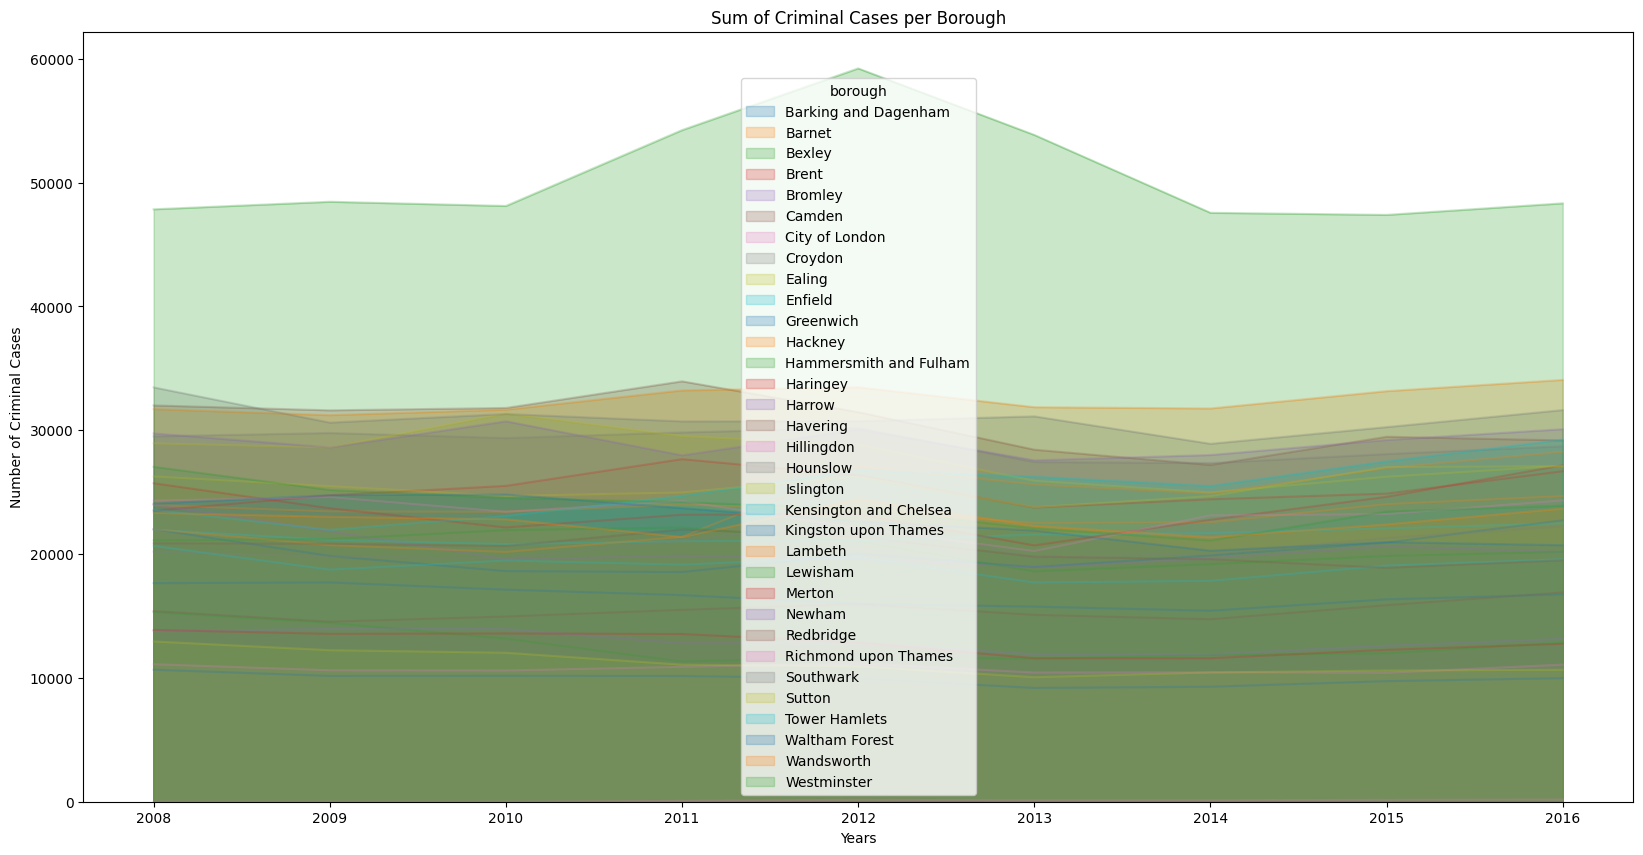

In [18]:
ap1.plot(kind='area', 
             alpha=0.25, # 0-1, default value a= 0.5
             stacked=False,
             figsize=(20, 10)
        )

plt.title('Sum of Criminal Cases per Borough')
plt.ylabel('Number of Criminal Cases')
plt.xlabel('Years')

plt.show()

Insight: From area plot above, we can conclude that Westminster is the highest cumulative rate of annual criminal cases and there was a significant increase in cases in 2012.

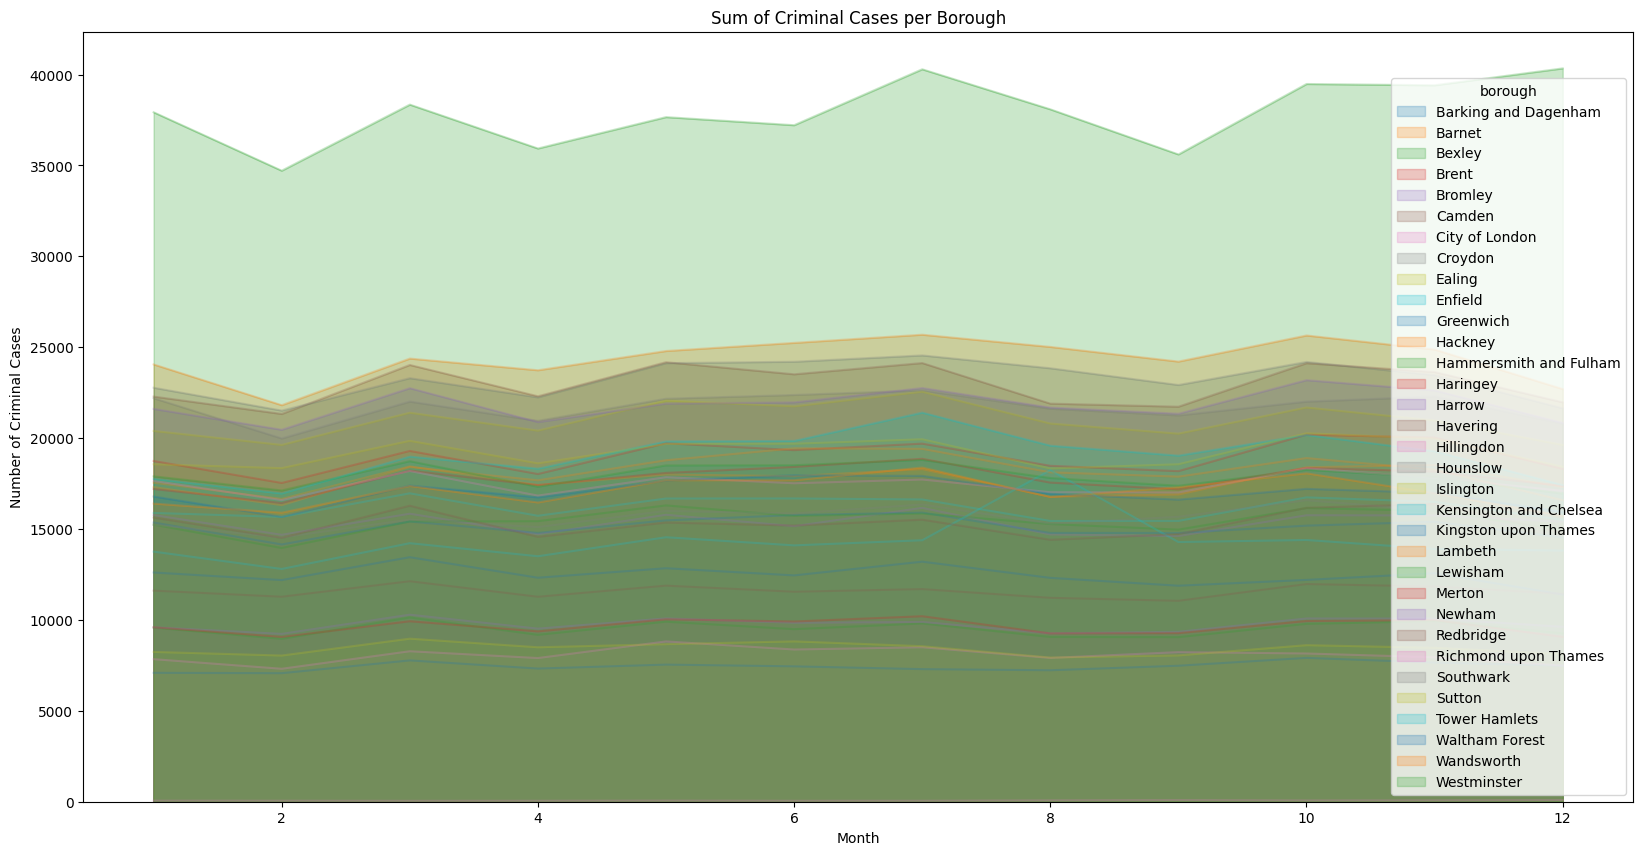

In [19]:
ap2.plot(kind='area', 
             alpha=0.25, # 0-1, default value a= 0.5
             stacked=False,
             figsize=(20, 10),
            )

plt.title('Sum of Criminal Cases per Borough')
plt.ylabel('Number of Criminal Cases')
plt.xlabel('Month')

plt.show()

Insight: From area plot above, we can conclude that Westminster is the highest cumulative rate of monthly criminal cases. Time series data movements tend to go up and down, but seems still stationary on mean.

### Histogram

Question: What is the frequency distribution of the top 3 number criminal cases from the London's borough in 2008-2013?

Create the required dataframe

In [20]:
ht1 = df[df['year'] <= 2013]
ht1

,lsoa_code,borough,major_category,minor_category,value,year,month
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
...,...,...,...,...,...,...,...
13490595,E01001144,Croydon,Violence Against the Person,Harassment,0,2012,1
13490596,E01000655,Bromley,Theft and Handling,Theft From Shops,0,2010,7
13490598,E01032577,Hillingdon,Theft and Handling,Other Theft,0,2012,2
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2


Pre-processing the dataset so we have top 3 borough that has highest criminal cases

In [21]:
ht1 = ht1.pivot_table(index='borough', columns='year', values='value', aggfunc='sum')
ht1['Total'] = ht1.sum(axis=1)
ht1.sort_values(['Total'], ascending=False, axis=0, inplace=True)
ht1_top3 = ht1.drop('Total', axis=1, inplace=True)
ht1_top3 = ht1.head(n=3).transpose()
ht1_top3


borough,Westminster,Lambeth,Camden
year,,,
2008,47846,31717,32010
2009,48456,31225,31612
2010,48116,31671,31804
2011,54243,33224,33956
2012,59226,33473,31472
2013,53852,31868,28435


Generate histogram

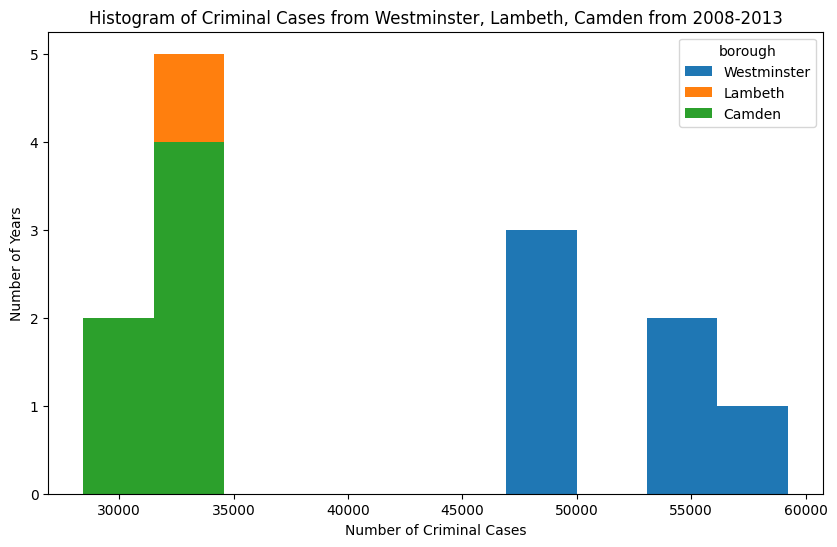

In [22]:
ht1_top3.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Criminal Cases from Westminster, Lambeth, Camden from 2008-2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Criminal Cases')

plt.show()

Generate histogram

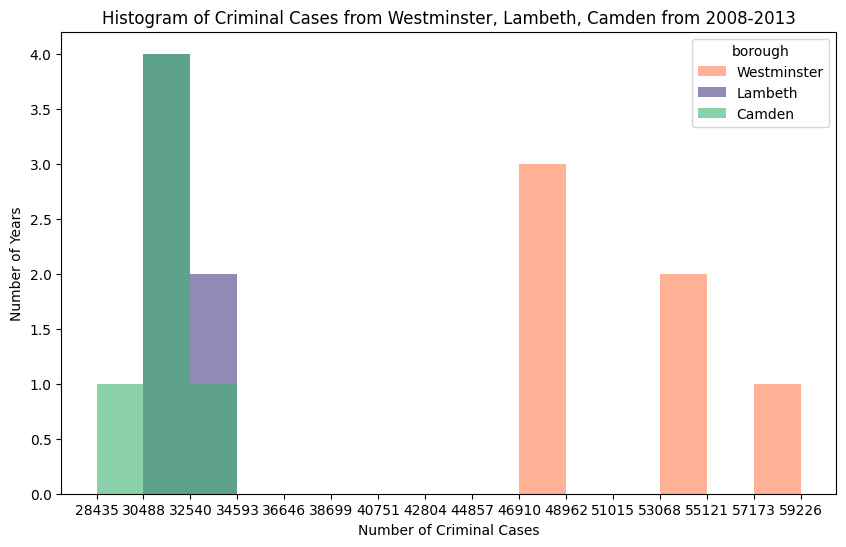

In [23]:
# let's get the x-tick values
count, bin_edges = np.histogram(ht1_top3, 15)

# un-stacked histogram
ht1_top3.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Criminal Cases from Westminster, Lambeth, Camden from 2008-2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Criminal Cases')

plt.show()

Insight: From histogram above, we can conclude that the criminal cases frequency distribution of Westminster tends to spread than Lambeth and Camden.

### Bar Chart

Question: Create a horizontal bar plot showing the top 10 of total criminal cases in London for the period 2008 - 2016.

Create the required dataframe

In [24]:
bc1 = df.pivot_table(index='borough', columns='year', values='value', aggfunc='sum')
bc1['Total'] = bc1.sum(axis=1)
bc1.sort_values(['Total'], ascending=False, axis=0, inplace=True)
bc1_top10 = bc1['Total'].head(n=10)
bc1_top10

borough
Westminster      455028
Lambeth          292178
Southwark        278809
Camden           275147
Newham           262024
Croydon          260294
Ealing           251562
Islington        230286
Tower Hamlets    228613
Brent            227551
Name: Total, dtype: int64

Create Horizontal Bar Plot

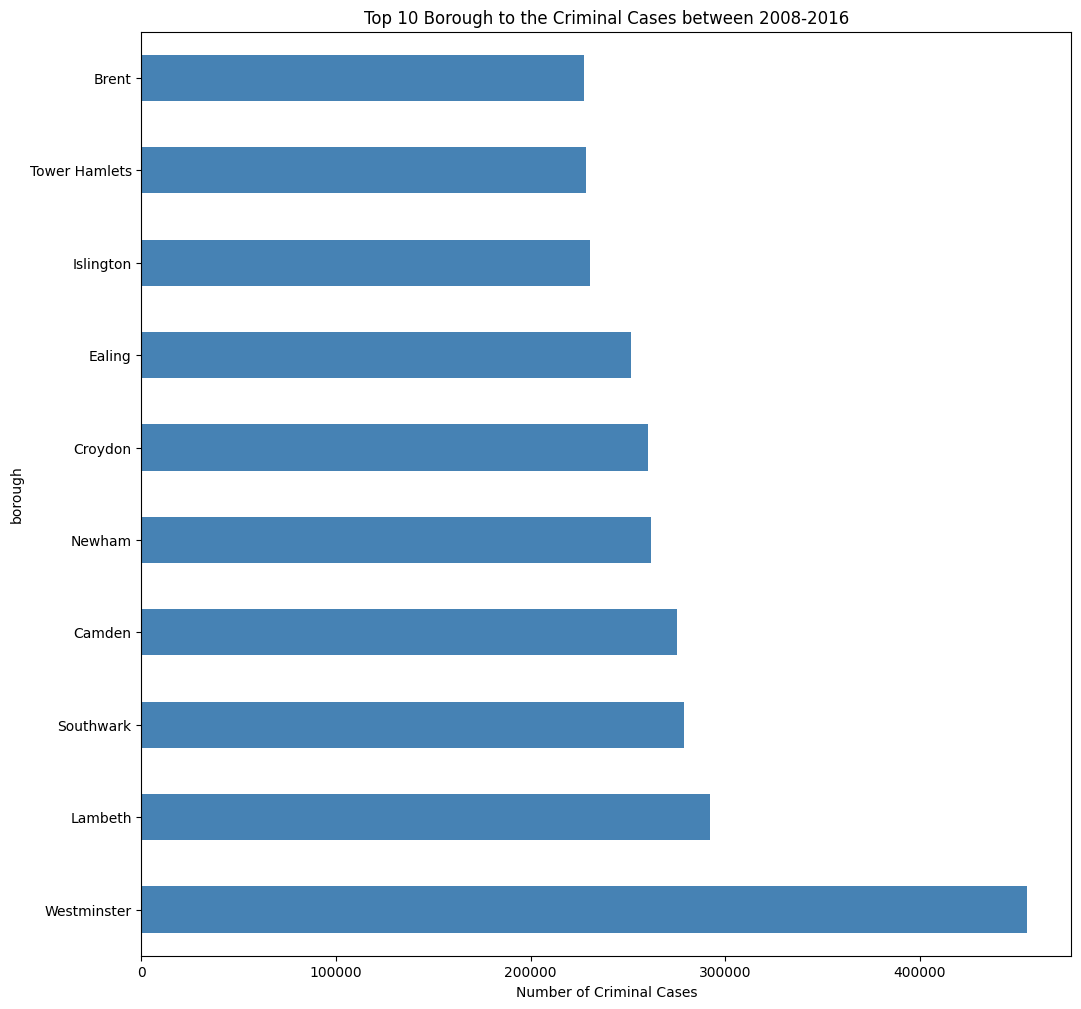

In [25]:
bc1_top10.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Criminal Cases')
plt.title('Top 10 Borough to the Criminal Cases between 2008-2016')
# for index, value in enumerate(df_top15): 
#     label = format(int(value), ',') # format int with commas
#     # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
#     plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')
plt.show()

Insight: From the horizontal bar plot above, we know that Westminster has the highest of total criminal cases, and followed by Lambeth, Southwark, Camden,  Newham, Croydon, Ealing, Islington, Tower Hamlets, Brent as top 10thof total criminal cases

### Pie Chart

Question: How is the percentage of major and minor criminal category that occurs in London?

Make the required dataframe

In [26]:
pc1 = df['major_category'].value_counts()

Make the required dataframe

In [27]:
pc2 = df['minor_category'].value_counts()

Create Pice Chart

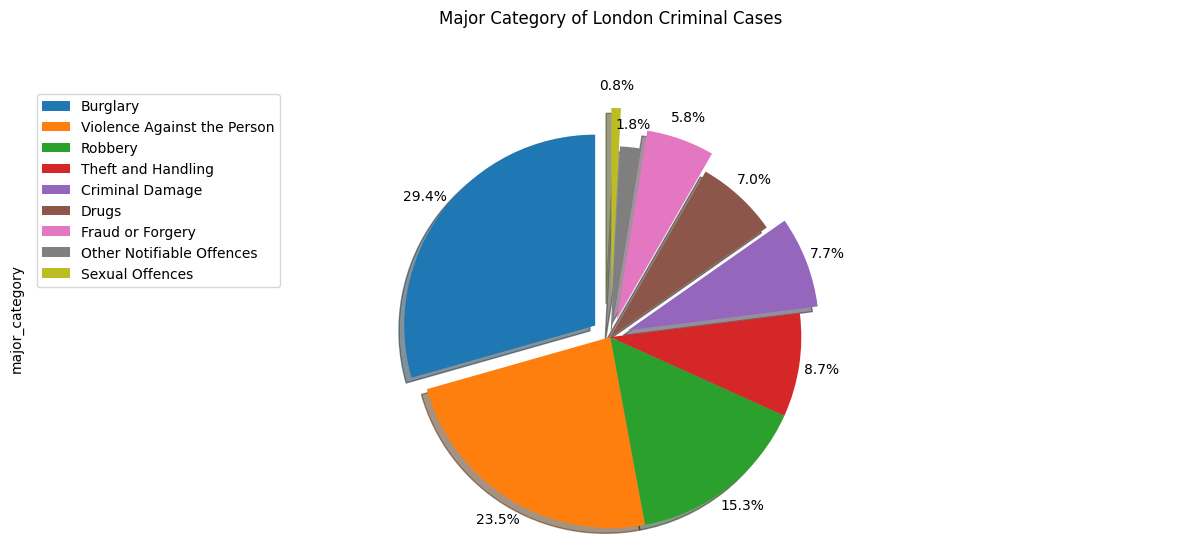

In [28]:
explode_list = [0.1, 0, 0, 0, 0.1, 0, 0.1, 0, 0.2] # ratio for each continent with which to offset each wedge.

pc1.plot(kind='pie',
         figsize=(15, 6),
         autopct='%1.1f%%', 
         startangle=90,    
         shadow=True,       
         labels=None,         # turn off labels on pie chart
         pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
         explode=explode_list # 'explode' lowest 3 continents
         )

# scale the title up by 12% to match pctdistance
plt.title('Major Category of London Criminal Cases', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df['major_category'].unique(), loc='upper left') 

plt.show()

Insight: From the pie chart above, we know that Burglary is the most often appears as a major category with 29.4%, while sex is the opposite with 0.8%.

Create Pice Chart

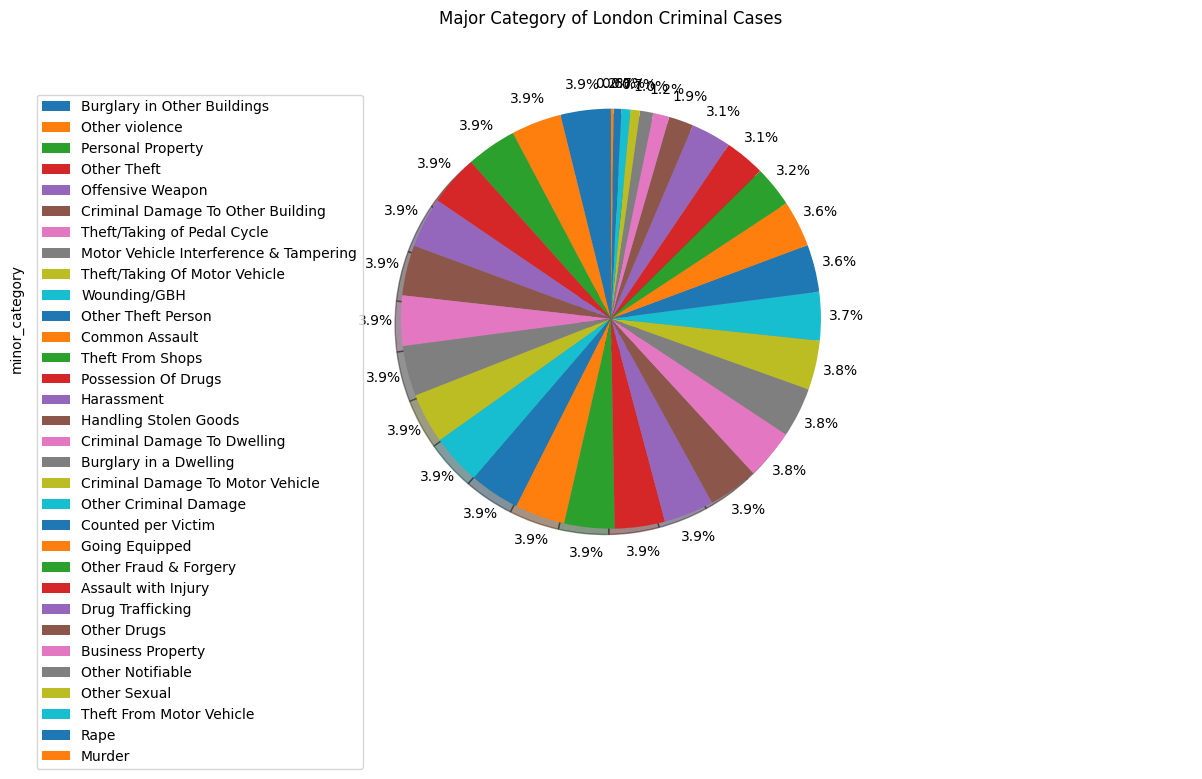

In [29]:
pc2.plot(kind='pie',
         figsize=(15, 6),
         autopct='%1.1f%%', 
         startangle=90,    
         shadow=True,       
         labels=None,         # turn off labels on pie chart
         pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
         )

# scale the title up by 12% to match pctdistance
plt.title('Major Category of London Criminal Cases', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df['minor_category'].unique(), loc='upper left') 

plt.show()

Insight: From the pie chart above, we know that most of minor category appeare in same percentage.

### Box Plot

Question: Create a box plot to visualize the distribution of total criminal cases in each year of Borough.

Create the required dataframe

In [30]:
bp1 = df.pivot_table(index='borough', columns='year', values='value', aggfunc=sum)
bp1.head()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
borough,,,,,,,,,
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164


Create Horizontal Box Plot

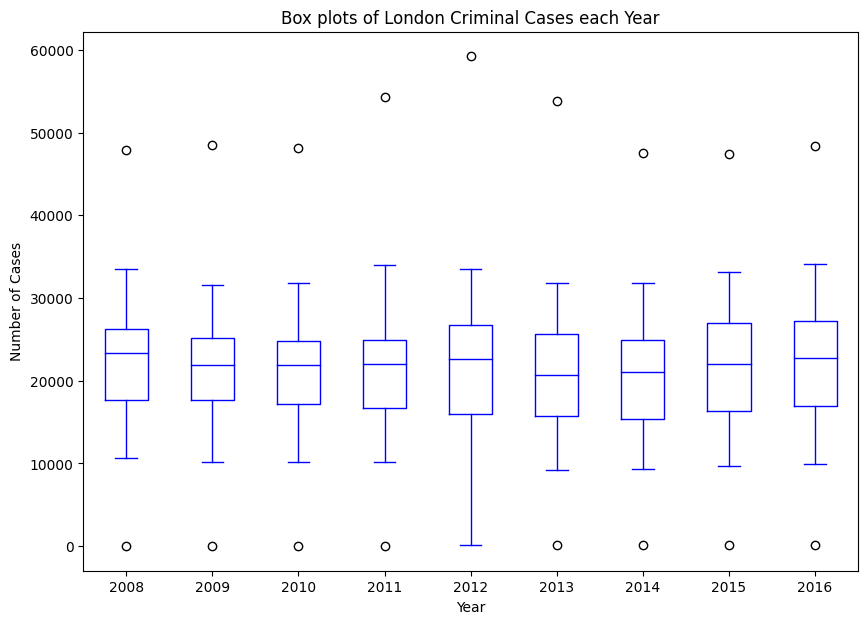

In [31]:
bp1.plot(kind='box', figsize=(10, 7), color='blue', vert=True)

plt.title('Box plots of London Criminal Cases each Year')
plt.xlabel('Year')
plt.ylabel('Number of Cases')

plt.show()

Insight: From the box plot above, shows us that distribution of total criminal cases tends to be the same annually, but in 2012 it had a distribution that tended to be wider. There are outliers at the top and bottom of the box plot range, namely the existence of boroughs with 0 cases and there are also boroughs that have very high cases every year.

### Scatter Plot

Question: Create a scatter plot of the London's total criminal cases in period 2008-2013

Create a required dataframe

In [32]:
sp1 = df.pivot_table(index='year', columns='borough', values='value', aggfunc=sum)
sp1['Total'] = sp1.sum(axis=1)
sp11 = sp1[['Total']]
sp11.reset_index(inplace=True)
sp11

borough,year,Total
0,2008,738641
1,2009,717214
2,2010,715324
3,2011,724915
4,2012,737329
5,2013,686407
6,2014,680183
7,2015,711624
8,2016,736121


Make sure that Total column is correct

In [33]:
print('Total: ',sp1.Total.sum())
print('Value: ',df.value.sum())

Total:  6447758
Value:  6447758


Create a scatter plot

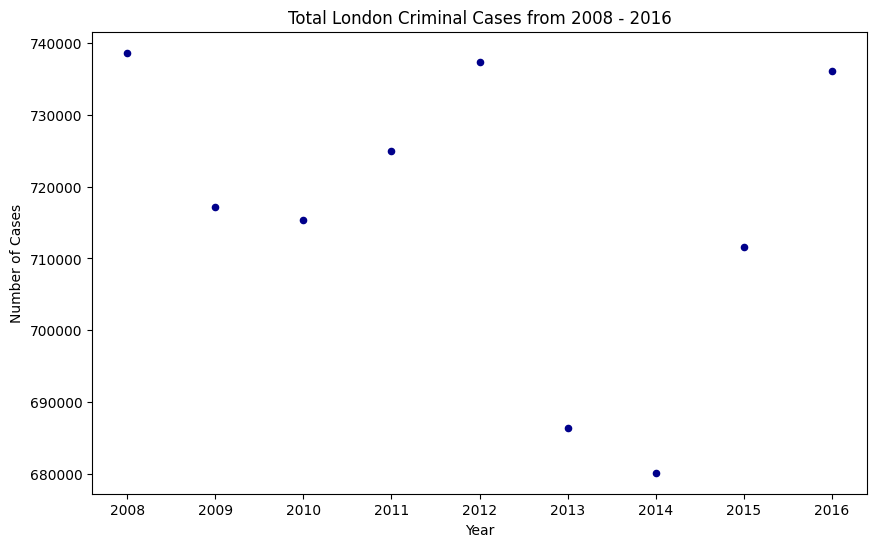

In [34]:
sp11.plot(kind='scatter', x='year', y='Total', figsize=(10, 6), color='darkblue')

plt.title('Total London Criminal Cases from 2008 - 2016')
plt.xlabel('Year')
plt.ylabel('Number of Cases')

plt.show()

Insight: From  the scatter plot above, we can conclude that the difference is not very significant between years.

### Word Clouds

Question: What words of major categories that often appear in criminal cases in London?

Create list

In [35]:
wc1 = df['major_category']

We are going to visualize word clouds with mask, so before run the code below, get the london mask file and put in the same folder with this notebook.

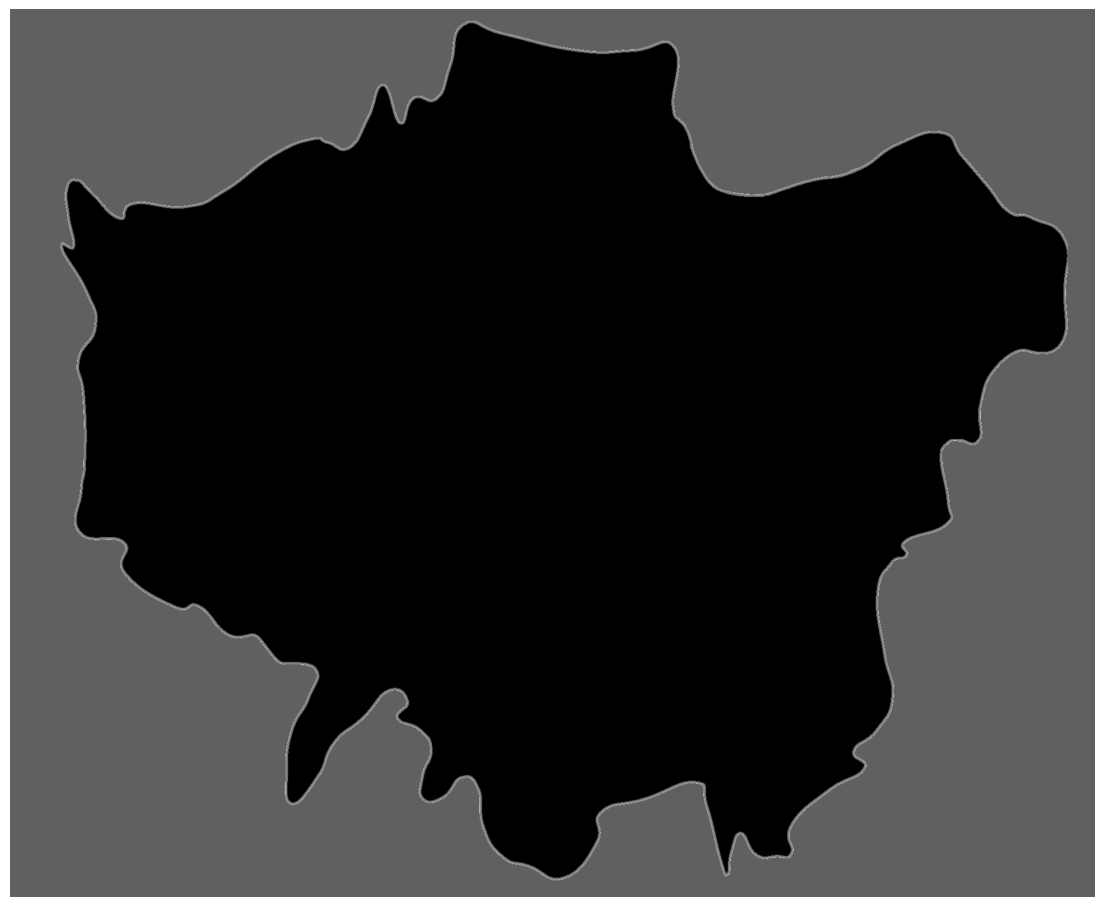

In [36]:
london_mask = np.array(Image.open('data\london_mask.png'))
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(london_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

Set stopword

In [37]:
stopwords = set(STOPWORDS)

Create word clouds

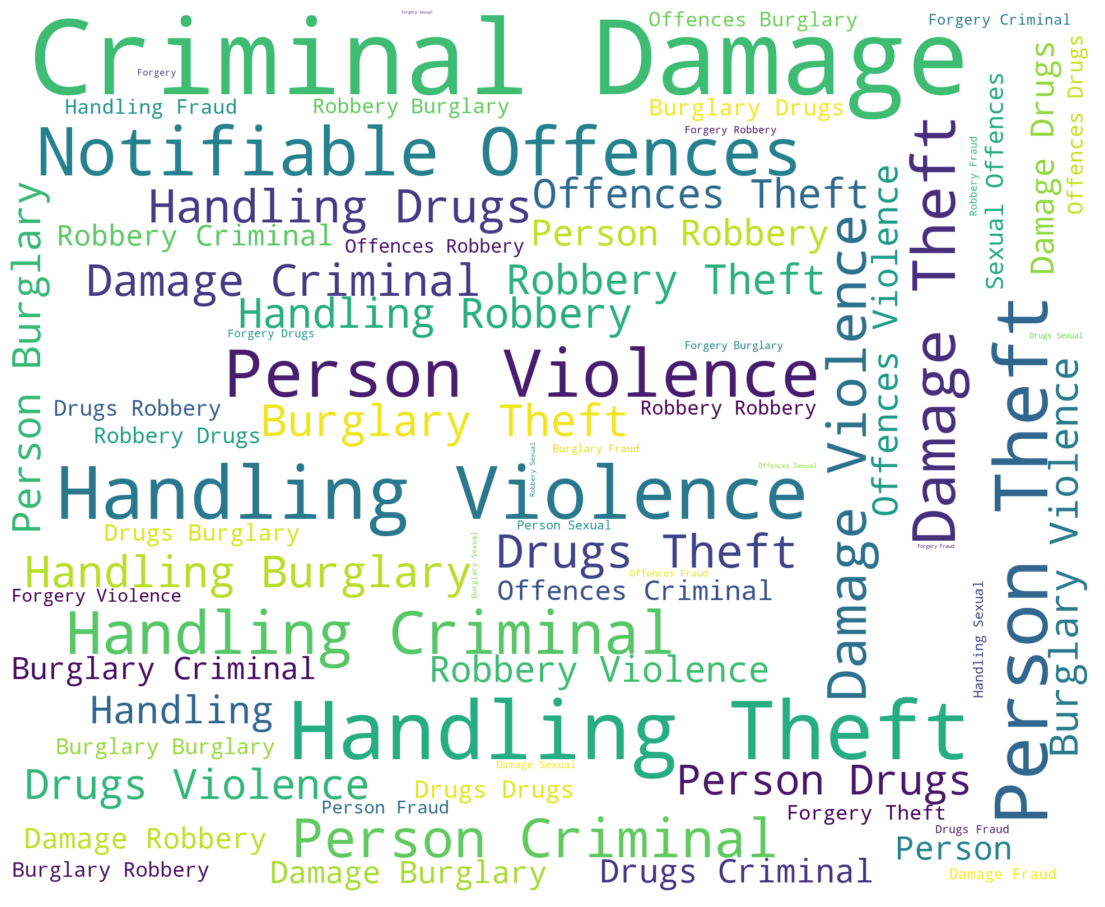

In [38]:
# instantiate a word cloud object
london_wc = WordCloud(background_color='white', mask=london_mask, stopwords=stopwords)

# generate the word cloud
london_wc.generate(' '.join(wc1.values))

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(london_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Insight: From word clouds above, we know that Criminal, Damage, Handling, and Theft has largest font size, it means that those words often appears in major category criminal cases.

### Folium Maps

Question: Create a Folium Map of London

Define the world map centered around London with a 9 zoom level

In [39]:
world_map = folium.Map(location=[51.50209939078944, -0.12486231307153765], zoom_start=9)

world_map

Create a Stamen Toner map of the world centered around London

In [40]:
world_map = folium.Map(location=[51.50209939078944, -0.12486231307153765], zoom_start=13, tiles='Stamen Toner')

world_map

Create a Stamen Terrain map of the world centered around London

In [41]:
world_map = folium.Map(location=[51.50209939078944, -0.12486231307153765], zoom_start=13, tiles='Stamen Terrain')

world_map

Insight: From folium maps above, we can know a visualization of the London's geographical location

---

# Overall Analysis

Based on data visualization that has been carried out on criminal case data in London in 2008-2013, information is obtained that there are various criminal cases with various categories that occurred in London. The most frequent cases are Robbery and Westminster being the area with the most cases. The distribution of data each year tends to be the same.